In [1]:
print('Downloading dependencies', end='')
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Done')


## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           2.0.0-pyh9f0ad1d_0 conda-f

In [4]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [5]:
with open('newyork_data.json') as json_data:
    newyorkcity_data = json.load(json_data)
newyorkcity_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [6]:
nyneighborhoods_data = newyorkcity_data['features']
nyneighborhoods_data[0] #show the first item in the list

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [7]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
nyneighborhoods = pd.DataFrame(columns=column_names)
nyneighborhoods

Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []

In [8]:
for data in nyneighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    nyneighborhoods = nyneighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
nyneighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [9]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(nyneighborhoods['Borough'].unique()),
        nyneighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [10]:
nyneighborhoods.shape

(306, 4)

In [11]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="nyc_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [12]:
# create map of New York using latitude and longitude values
map_newyorkcity = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(nyneighborhoods['Latitude'], nyneighborhoods['Longitude'], nyneighborhoods['Borough'], nyneighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyorkcity)  
    
map_newyorkcity

In [13]:
CLIENT_ID = 'B35L000DVQBFKI4IS5AC22RPYJNANWVJ0RR0WW41OSYOCTIW' # your Foursquare ID
CLIENT_SECRET = 'U5ADQHCWGEE1NY2BOHQ5PWZJPUX5IPLIYCXKBVNQJHBWHJCN' # your Foursquare Secret
VERSION = '20180604'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: B35L000DVQBFKI4IS5AC22RPYJNANWVJ0RR0WW41OSYOCTIW
CLIENT_SECRET:U5ADQHCWGEE1NY2BOHQ5PWZJPUX5IPLIYCXKBVNQJHBWHJCN


In [14]:
nyneighborhoods.loc[0, 'Neighborhood']

'Wakefield'

In [15]:
neighborhood_latitude = nyneighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = nyneighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = nyneighborhoods.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Wakefield are 40.89470517661, -73.84720052054902.


In [16]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=B35L000DVQBFKI4IS5AC22RPYJNANWVJ0RR0WW41OSYOCTIW&client_secret=U5ADQHCWGEE1NY2BOHQ5PWZJPUX5IPLIYCXKBVNQJHBWHJCN&v=20180604&ll=40.89470517661,-73.84720052054902&radius=1000&limit=100'

In [17]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f42fbbbcd347610a77d9675'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Wakefield',
  'headerFullLocation': 'Wakefield, Bronx',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 47,
  'suggestedBounds': {'ne': {'lat': 40.903705185610015,
    'lng': -73.83531662200086},
   'sw': {'lat': 40.88570516760999, 'lng': -73.85908441909719}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c537892fd2ea593cb077a28',
       'name': 'Lollipops Gelato',
       'location': {'address': '4120 Baychester Ave',
        'crossStreet': 'Edenwald & Bussing Ave',
        'lat': 40.894123150205274,
        'ln

In [18]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#------------------------------------------

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name            categories        lat        lng
0    Lollipops Gelato          Dessert Shop  40.894123 -73.845892
1  Ripe Kitchen & Bar  Caribbean Restaurant  40.898152 -73.838875
2     Ali's Roti Shop  Caribbean Restaurant  40.894036 -73.856935
3            Rite Aid              Pharmacy  40.896649 -73.844846
4    Carvel Ice Cream        Ice Cream Shop  40.890487 -73.848568

In [19]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

47 venues were returned by Foursquare.


In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue_Category']
    
    return(nearby_venues)

In [21]:

# Creating a new dataframe with new york city venues
nyneighborhoods_venues = getNearbyVenues(names=nyneighborhoods['Neighborhood'],
                                   latitudes=nyneighborhoods['Latitude'],
                                   longitudes=nyneighborhoods['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [22]:
print(nyneighborhoods_venues.shape)
nyneighborhoods_venues.head()

(10073, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

              Venue  Venue Latitude  Venue Longitude  Venue_Category  
0  Lollipops Gelato       40.894123       -73.845892    Dessert Shop  
1          Rite Aid       40.896649       -73.844846        Pharmacy  
2  Carvel Ice Cream       40.890487       -73.848568  Ice Cream Shop  
3         Walgreens       40.896528       -73.844700        Pharmacy  
4             Shell       40.894187       -73.845862     Gas Station

In [23]:
nyneighborhoods_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                               
Allerton                                      31                      31   
Annadale                                      13                      13   
Arden Heights                                  6                       6   
Arlington                                      5                       5   
Arrochar                                      21                      21   
Arverne                                       21                      21   
Astoria                                      100                     100   
Astoria Heights                               12                      12   
Auburndale                                    22                      22   
Bath Beach                                    46                      46   
Battery Park City                             73                      73   
Bay Ridge                                     79                      79   
Bay Terrace                                   46                      46   
Baychester                                    20                      20   
Bayside                                       73                      73   
Bayswater                                      2                       2   
Bedford Park                                  33                      33   
Bedford Stuyvesant                            28                      28   
Beechhurst                                    15                      15   
Bellaire                                      12                      12   
Belle Harbor                                  17                      17   
Bellerose                                     19                      19   
Belmont                                       98                      98   
Bensonhurst                                   25                      25   
Bergen Beach                                   5                       5   
Blissville                                    19                      19   
Bloomfield                                     4                       4   
Boerum Hill                                   87                      87   
Borough Park                                  21                      21   
Breezy Point                                   5                       5   
Briarwood                                     10                      10   
Brighton Beach                                44                      44   
Broad Channel                                  5                       5   
Broadway Junction                             19                      19   
Bronxdale                                     11                      11   
Brooklyn Heights                             100                     100   
Brookville                                     1                       1   
Brownsville                                   18                      18   
Bulls Head                                    44                      44   
Bushwick                                      69                      69   
Butler Manor                                   7                       7   
Cambria Heights                                9                       9   
Canarsie                                       8                       8   
Carnegie Hill                                 89                      89   
Carroll Gardens                              100                     100   
Castle Hill                                    6                       6   
Castleton Corners                             18                      18   
Central Harlem                                45                      45   
Charleston                                    30                      30   
Chelsea                                      107                     107   
Chinatown                                    100                     100   

In [24]:
print('There are {} uniques categories.'.format(len(nyneighborhoods_venues['Venue_Category'].unique())))

There are 431 uniques categories.


In [25]:
# one hot encoding
nyneighborhoods_onehot = pd.get_dummies(nyneighborhoods_venues[['Venue_Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nyneighborhoods_onehot['Neighborhood'] = nyneighborhoods_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [nyneighborhoods_onehot.columns[-1]] + list(nyneighborhoods_onehot.columns[:-1])
nyneighborhoods_onehot = nyneighborhoods_onehot[fixed_columns]

nyneighborhoods_onehot.head()

Yoga Studio  Accessories Store  Adult Boutique  Afghan Restaurant  \
0            0                  0               0                  0   
1            0                  0               0                  0   
2            0                  0               0                  0   
3            0                  0               0                  0   
4            0                  0               0                  0   

   African Restaurant  Airport Terminal  American Restaurant  Antique Shop  \
0                   0                 0                    0             0   
1                   0                 0                    0             0   
2                   0                 0                    0             0   
3                   0                 0                    0             0   
4                   0                 0                    0             0   

   Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0       0                 0                       0            0           0   
1       0                 0                       0            0           0   
2       0                 0                       0            0           0   
3       0                 0                       0            0           0   
4       0                 0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Auditorium  Australian Restaurant  Austrian Restaurant  \
0                   0           0                      0                    0   
1                   0           0                      0                    0   
2                   0           0                      0                    0   
3                   0           0                      0                    0   
4                   0           0                      0                    0   

   Auto Dealership  Auto Garage  Automotive Shop  BBQ Joint  Baby Store  \
0                0            0                0          0           0   
1                0            0                0          0           0   
2                0            0                0          0           0   
3                0            0                0          0           0   
4                0            0                0          0           0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0           0       0     0    0               0                 0   
1           0       0     0    0               0                 0   
2           0       0     0    0               0                 0   
3           0       0     0    0               0                 0   
4           0       0     0    0               0                 0   

   Basketball Court  Bath House  Beach  Beach Bar  Bed & Breakfast  Beer Bar  \
0                 0           0      0          0                0         0   
1                 0           0      0          0                0         0   
2                 0           0      0          0                0         0   
3                 0           0      0          0                0         0   
4                 0           0      0          0                0         0   

   Beer Garden  Beer Store  Big Box Store  Bike Rental / Bike Share  \
0            0           0              0                         0   
1            0           0              0                         0   
2            0           0              0                         0   
3            0           0              0                         0   
4            0           0  

In [26]:
# View size of new dataframe
nyneighborhoods_onehot.shape

(10073, 431)

In [27]:
nyneighborhoods_grouped = nyneighborhoods_onehot.groupby('Neighborhood').mean().reset_index()
nyneighborhoods_grouped

Neighborhood  Yoga Studio  Accessories Store  \
0                     Allerton     0.000000           0.000000   
1                     Annadale     0.000000           0.000000   
2                Arden Heights     0.000000           0.000000   
3                    Arlington     0.000000           0.000000   
4                     Arrochar     0.000000           0.000000   
5                      Arverne     0.000000           0.000000   
6                      Astoria     0.000000           0.000000   
7              Astoria Heights     0.000000           0.000000   
8                   Auburndale     0.000000           0.000000   
9                   Bath Beach     0.000000           0.000000   
10           Battery Park City     0.000000           0.000000   
11                   Bay Ridge     0.000000           0.000000   
12                 Bay Terrace     0.000000           0.021739   
13                  Baychester     0.000000           0.000000   
14                     Bayside     0.013699           0.000000   
15                   Bayswater     0.000000           0.000000   
16                Bedford Park     0.000000           0.000000   
17          Bedford Stuyvesant     0.000000           0.000000   
18                  Beechhurst     0.000000           0.000000   
19                    Bellaire     0.000000           0.000000   
20                Belle Harbor     0.000000           0.000000   
21                   Bellerose     0.000000           0.000000   
22                     Belmont     0.000000           0.000000   
23                 Bensonhurst     0.000000           0.000000   
24                Bergen Beach     0.000000           0.000000   
25                  Blissville     0.000000           0.000000   
26                  Bloomfield     0.000000           0.000000   
27                 Boerum Hill     0.022989           0.000000   
28                Borough Park     0.000000           0.000000   
29                Breezy Point     0.000000           0.000000   
30                   Briarwood     0.000000           0.000000   
31              Brighton Beach     0.000000           0.000000   
32               Broad Channel     0.000000           0.000000   
33           Broadway Junction     0.000000           0.000000   
34                   Bronxdale     0.000000           0.000000   
35            Brooklyn Heights     0.040000           0.000000   
36                  Brookville     0.000000           0.000000   
37                 Brownsville     0.000000           0.000000   
38                  Bulls Head     0.000000           0.000000   
39                    Bushwick     0.000000           0.000000   
40                Butler Manor     0.000000           0.000000   
41             Cambria Heights     0.000000           0.000000   
42                    Canarsie     0.000000           0.000000   
43               Carnegie Hill     0.033708           0.000000   
44             Carroll Gardens     0.000000           0.000000   
45                 Castle Hill     0.000000           0.000000   
46           Castleton Corners     0.000000           0.000000   
47              Central Harlem     0.000000           0.000000   
48                  Charleston     0.000000           0.000000   
49                     Chelsea     0.000000           0.000000   
50                   Chinatown     0.010000           0.000000   
51                 City Island     0.000000           0.000000   
52                   City Line     0.000000           0.000000   
53                Civic Center     0.030000           0.000000   
54           Claremont Village     0.000000           0.000000   
55                Clason Point     0.000000           0.000000   
56                     Clifton     0.000000           0.000000   
57                     Clinton     0.000000           0.000000   
58                Clinton Hill     0.031250           0.000000   
59                  Co-op City     0.000000           0.00

In [28]:
# New dataframe size
nyneighborhoods_grouped.shape

(302, 431)

In [29]:
num_top_venues = 5

for hood in nyneighborhoods_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = nyneighborhoods_grouped[nyneighborhoods_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allerton----
                venue  freq
0         Pizza Place  0.13
1      Discount Store  0.06
2         Supermarket  0.06
3       Deli / Bodega  0.06
4  Chinese Restaurant  0.06


----Annadale----
                 venue  freq
0  American Restaurant  0.15
1           Restaurant  0.08
2       Cosmetics Shop  0.08
3               Bakery  0.08
4          Pizza Place  0.08


----Arden Heights----
           venue  freq
0  Deli / Bodega  0.17
1       Pharmacy  0.17
2    Coffee Shop  0.17
3    Pizza Place  0.17
4       Bus Stop  0.17


----Arlington----
            venue  freq
0   Deli / Bodega   0.2
1        Bus Stop   0.2
2          Arcade   0.2
3   Grocery Store   0.2
4  Scenic Lookout   0.2


----Arrochar----
                venue  freq
0            Bus Stop  0.14
1       Deli / Bodega  0.10
2  Italian Restaurant  0.10
3         Supermarket  0.05
4      Cosmetics Shop  0.05


----Arverne----
             venue  freq
0        Surf Spot  0.19
1    Metro Station  0.10
2   Sandwich Pla

In [30]:
# function to sort the venues in desc order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

# create dataframe
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
nyneighborhoods_venues_sorted = pd.DataFrame(columns=columns)
nyneighborhoods_venues_sorted['Neighborhood'] = nyneighborhoods_grouped['Neighborhood']

for ind in np.arange(nyneighborhoods_grouped.shape[0]):
    nyneighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyneighborhoods_grouped.iloc[ind, :], num_top_venues)

nyneighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0       Allerton           Pizza Place    Chinese Restaurant   
1       Annadale   American Restaurant              Pharmacy   
2  Arden Heights                Lawyer         Deli / Bodega   
3      Arlington         Deli / Bodega              Bus Stop   
4       Arrochar              Bus Stop    Italian Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0        Discount Store         Deli / Bodega           Supermarket   
1            Restaurant           Pizza Place          Liquor Store   
2              Pharmacy           Coffee Shop              Bus Stop   
3                Arcade        Scenic Lookout         Grocery Store   
4         Deli / Bodega    Athletics & Sports        Sandwich Place   

  6th Most Common Venue 7th Most Common Venue     8th Most Common Venue  \
0      Department Store            Playground      Fast Food Restaurant   
1      Sushi Restaurant                  Food                     Diner   
2           Pizza Place     Fish & Chips Shop                Eye Doctor   
3         Women's Store     Fish & Chips Shop                Eye Doctor   
4          Liquor Store            Bagel Shop  Mediterranean Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0            Bike Trail    Martial Arts School  
1         Train Station         Cosmetics Shop  
2               Factory     Falafel Restaurant  
3               Factory     Falafel Restaurant  
4           Pizza Place                  Hotel

In [31]:
# set number of clusters
kclusters = 5

nyneighborhoods_grouped_clustering = nyneighborhoods_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nyneighborhoods_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 3, 3, 3, 0, 0, 0, 0, 0], dtype=int32)

In [32]:
nyneighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

nyneighborhoods_merged = nyneighborhoods

# merge nyneighborhoods_grouped with nyneighborhoods_data to add latitude/longitude for each neighborhood
nyneighborhoods_merged = nyneighborhoods_merged.join(nyneighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

nyneighborhoods_merged.head() # check the last columns!

Borough Neighborhood   Latitude  Longitude  Cluster Labels  \
0   Bronx    Wakefield  40.894705 -73.847201               0   
1   Bronx   Co-op City  40.874294 -73.829939               0   
2   Bronx  Eastchester  40.887556 -73.827806               0   
3   Bronx    Fieldston  40.895437 -73.905643               0   
4   Bronx    Riverdale  40.890834 -73.912585               0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0              Pharmacy         Deli / Bodega        Sandwich Place   
1  Fast Food Restaurant        Baseball Field            Bagel Shop   
2  Caribbean Restaurant         Deli / Bodega                 Diner   
3                 River           Bus Station                 Plaza   
4           Bus Station                  Park                  Bank   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0            Donut Shop          Dessert Shop           Gas Station   
1         Grocery Store              Pharmacy        Discount Store   
2           Bus Station    Seafood Restaurant     Convenience Store   
3         Women's Store     Fish & Chips Shop               Exhibit   
4             Locksmith          Home Service                   Gym   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0        Ice Cream Shop            Laundromat         Women's Store   
1           Post Office            Restaurant           Bus Station   
2  Fast Food Restaurant    Chinese Restaurant                Bakery   
3            Eye Doctor               Factory    Falafel Restaurant   
4                 Plaza        Baseball Field   Filipino Restaurant   

  10th Most Common Venue  
0   Fast Food Restaurant  
1                   Park  
2        Automotive Shop  
3                   Farm  
4             Eye Doctor

In [33]:
new_nyneighborhoods_merged = nyneighborhoods_merged.dropna(axis = 0, how ='any') 

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# colors=['blue','green','orange','red']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(new_nyneighborhoods_merged['Latitude'], new_nyneighborhoods_merged['Longitude'], new_nyneighborhoods_merged['Neighborhood'], new_nyneighborhoods_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color = rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [34]:
cluster1=new_nyneighborhoods_merged.loc[new_nyneighborhoods_merged['Cluster Labels'] == 0, new_nyneighborhoods_merged.columns[[1] + list(range(5, new_nyneighborhoods_merged.shape[1]))]]
cluster1.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0    Wakefield              Pharmacy         Deli / Bodega   
1   Co-op City  Fast Food Restaurant        Baseball Field   
2  Eastchester  Caribbean Restaurant         Deli / Bodega   
3    Fieldston                 River           Bus Station   
4    Riverdale           Bus Station                  Park   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0        Sandwich Place            Donut Shop          Dessert Shop   
1            Bagel Shop         Grocery Store              Pharmacy   
2                 Diner           Bus Station    Seafood Restaurant   
3                 Plaza         Women's Store     Fish & Chips Shop   
4                  Bank             Locksmith          Home Service   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0           Gas Station        Ice Cream Shop            Laundromat   
1        Discount Store           Post Office            Restaurant   
2     Convenience Store  Fast Food Restaurant    Chinese Restaurant   
3               Exhibit            Eye Doctor               Factory   
4                   Gym                 Plaza        Baseball Field   

  9th Most Common Venue 10th Most Common Venue  
0         Women's Store   Fast Food Restaurant  
1           Bus Station                   Park  
2                Bakery        Automotive Shop  
3    Falafel Restaurant                   Farm  
4   Filipino Restaurant             Eye Doctor

In [35]:
nyneighborhoods_venues.rename(columns = {'Venue Category':'Venue_Category'}, inplace=True)
nyneighborhoods_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

              Venue  Venue Latitude  Venue Longitude  Venue_Category  
0  Lollipops Gelato       40.894123       -73.845892    Dessert Shop  
1          Rite Aid       40.896649       -73.844846        Pharmacy  
2  Carvel Ice Cream       40.890487       -73.848568  Ice Cream Shop  
3         Walgreens       40.896528       -73.844700        Pharmacy  
4             Shell       40.894187       -73.845862     Gas Station

In [36]:
search_values = ['African']
nyafrican_venues=nyneighborhoods_venues[nyneighborhoods_venues.Venue_Category.str.contains('|'.join(search_values ))]
nyafrican_venues

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
320   University Heights              40.855727              -73.910416   
368              Fordham              40.860997              -73.896427   
3720      Central Harlem              40.815976              -73.943211   
3730      Central Harlem              40.815976              -73.943211   
3747      Central Harlem              40.815976              -73.943211   

                       Venue  Venue Latitude  Venue Longitude  \
320          Accra Resturant       40.853871       -73.908421   
368        Papaye Restaurant       40.857407       -73.899738   
3720     Ponty Bistro Harlem       40.817886       -73.941522   
3730             Keur Sokhna       40.813556       -73.945001   
3747  Africa Kine Restaurant       40.813728       -73.944426   

          Venue_Category  
320   African Restaurant  
368   African Restaurant  
3720  African Restaurant  
3730  African Restaurant  
3747  African Restaurant

In [37]:
neighborhood=['Central Harlem','University Heights','Fordham']
venuecat=['Restaurant','Bank','Station','Bus','Metro']
suitable_venue=nyneighborhoods_venues[nyneighborhoods_venues.Venue_Category.str.contains('|'.join(venuecat)) & 
                                   nyneighborhoods_venues.Neighborhood.str.contains('|'.join(neighborhood))]
#nyneighborhoods_venues[nyneighborhoods_venues.Neighborhood.isin(neighborhood) & 
#nyneighborhoods_venues.Venue_Category.isin(venuecat)]
suitable_venue.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
320  University Heights              40.855727              -73.910416   
325  University Heights              40.855727              -73.910416   
328  University Heights              40.855727              -73.910416   
332  University Heights              40.855727              -73.910416   
346             Fordham              40.860997              -73.896427   

                      Venue  Venue Latitude  Venue Longitude  \
320         Accra Resturant       40.853871       -73.908421   
325              Chase Bank       40.854120       -73.907555   
328                Liberato       40.853744       -73.907966   
332              McDonald's       40.854307       -73.907291   
346  188 Bakery Cuchifritos       40.861602       -73.898311   

                Venue_Category  
320         African Restaurant  
325                       Bank  
328  Latin American Restaurant  
332       Fast Food Restaurant  
346  Latin American Restaurant

In [38]:
suitable_venue

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
320   University Heights              40.855727              -73.910416   
325   University Heights              40.855727              -73.910416   
328   University Heights              40.855727              -73.910416   
332   University Heights              40.855727              -73.910416   
346              Fordham              40.860997              -73.896427   
354              Fordham              40.860997              -73.896427   
360              Fordham              40.860997              -73.896427   
368              Fordham              40.860997              -73.896427   
379              Fordham              40.860997              -73.896427   
381              Fordham              40.860997              -73.896427   
387              Fordham              40.860997              -73.896427   
389              Fordham              40.860997              -73.896427   
392              Fordham              40.860997              -73.896427   
393              Fordham              40.860997              -73.896427   
395              Fordham              40.860997              -73.896427   
400              Fordham              40.860997              -73.896427   
401              Fordham              40.860997              -73.896427   
411              Fordham              40.860997              -73.896427   
413              Fordham              40.860997              -73.896427   
414              Fordham              40.860997              -73.896427   
422              Fordham              40.860997              -73.896427   
423              Fordham              40.860997              -73.896427   
424              Fordham              40.860997              -73.896427   
425              Fordham              40.860997              -73.896427   
3716      Central Harlem              40.815976              -73.943211   
3718      Central Harlem              40.815976              -73.943211   
3720      Central Harlem              40.815976              -73.943211   
3721      Central Harlem              40.815976              -73.943211   
3728      Central Harlem              40.815976              -73.943211   
3730      Central Harlem              40.815976              -73.943211   
3731      Central Harlem              40.815976              -73.943211   
3737      Central Harlem              40.815976              -73.943211   
3739      Central Harlem              40.815976              -73.943211   
3745      Central Harlem              40.815976              -73.943211   
3747      Central Harlem              40.815976              -73.943211   
3748      Central Harlem              40.815976              -73.943211   
3749      Central Harlem              40.815976              -73.943211   
3751      Central Harlem              40.815976              -73.943211   
3754      Central Harlem              40.815976              -73.943211   
3757      Central Harlem              40.815976              -73.943211   

                                    Venue  Venue Latitude  Venue Longitude  \
320                       Accra Resturant       40.853871       -73.908421   
325                            Chase Bank       40.854120       -73.907555   
328                              Liberato       40.853744       -73.907966   
332                            McDonald's       40.854307       -73.907291   
346                188 Bakery Cuchifritos       40.861602       -73.898311   
354                  Kasike Mofongo House       40.859929       -73.893177   
360                         Panda Express       40.863001       -73.900894   
368                     Papaye Restaurant       40.857407       -73.899738   
379                        Parilla Latina       40.861009       -73.891945   
381                            Chase Bank       40.862112       -73.898088   
387            Three  Spanish  Restaurant       40.859966       -73.893373   


In [39]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of venues are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of venues are 40.7127281, -74.0060152.


In [40]:
# create map of NY using latitude and longitude values
map_nyc = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(suitable_venue['Venue Latitude'], suitable_venue['Venue Longitude'], suitable_venue['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nyc)  
    
map_nyc

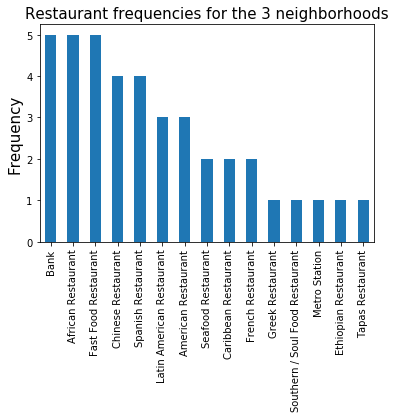

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
s = suitable_venue['Venue_Category'].value_counts()
plt.title('Restaurant frequencies for the 3 neighborhoods', fontsize=15)
plt.ylabel('Frequency', fontsize = 15) #for y label
#plt.xlabel('', fontsize = 15) #for x label
s.plot(kind='bar')
plt.savefig('Capstone11.png', bbox_inches="tight")
